# Selección del número de clústeres con análisis de silueta en el agrupamiento de KMeans

El análisis de silueta se puede utilizar para estudiar la distancia de separación entre los clústeres resultantes. El gráfico de silueta muestra una medida de la proximidad de cada punto de un clúster a los puntos de los clústeres vecinos y, por lo tanto, proporciona una forma de evaluar visualmente parámetros como el número de clústeres. Esta medida tiene un rango de [-1, 1].

Los coeficientes de silueta (como se denominan estos valores) cercanos a +1 indican que la muestra está lejos de los clústeres vecinos. Un valor de 0 indica que la muestra está en el límite de decisión entre dos clústeres vecinos o muy cerca de él y los valores negativos indican que esas muestras podrían haber sido asignadas al clúster incorrecto.

En este ejemplo, el análisis de silueta se utiliza para elegir un valor óptimo para n_clusters. El gráfico de silueta muestra que los valores de n_clusters de 3, 5 y 6 son una mala elección para los datos dados debido a la presencia de clústeres con puntuaciones de silueta por debajo del promedio y también debido a las amplias fluctuaciones en el tamaño de los gráficos de silueta. El análisis de siluetas es más ambivalente a la hora de decidir entre 2 y 4.

También se puede visualizar el tamaño del conglomerado a partir del grosor del gráfico de siluetas. El gráfico de siluetas para el conglomerado 0 cuando n_clusters es igual a 2, es más grande debido a la agrupación de los 3 subconglomerados en un gran conglomerado. Sin embargo, cuando n_clusters es igual a 4, todos los gráficos tienen un grosor más o menos similar y, por lo tanto, tamaños similares, como también se puede verificar a partir del gráfico de dispersión etiquetado a la derecha.


In [3]:
import warnings
warnings.filterwarnings('ignore')

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5804620679044765
For n_clusters = 6 The average silhouette_score is : 0.4966479110816959


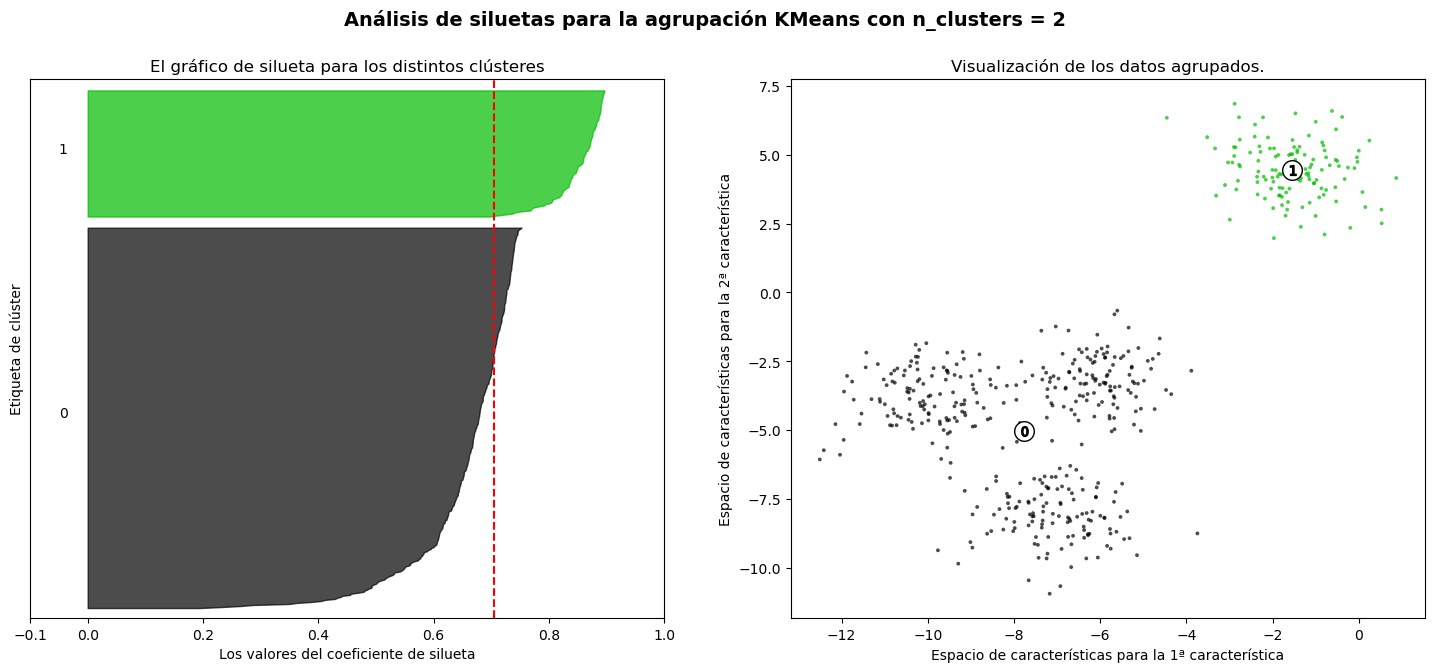

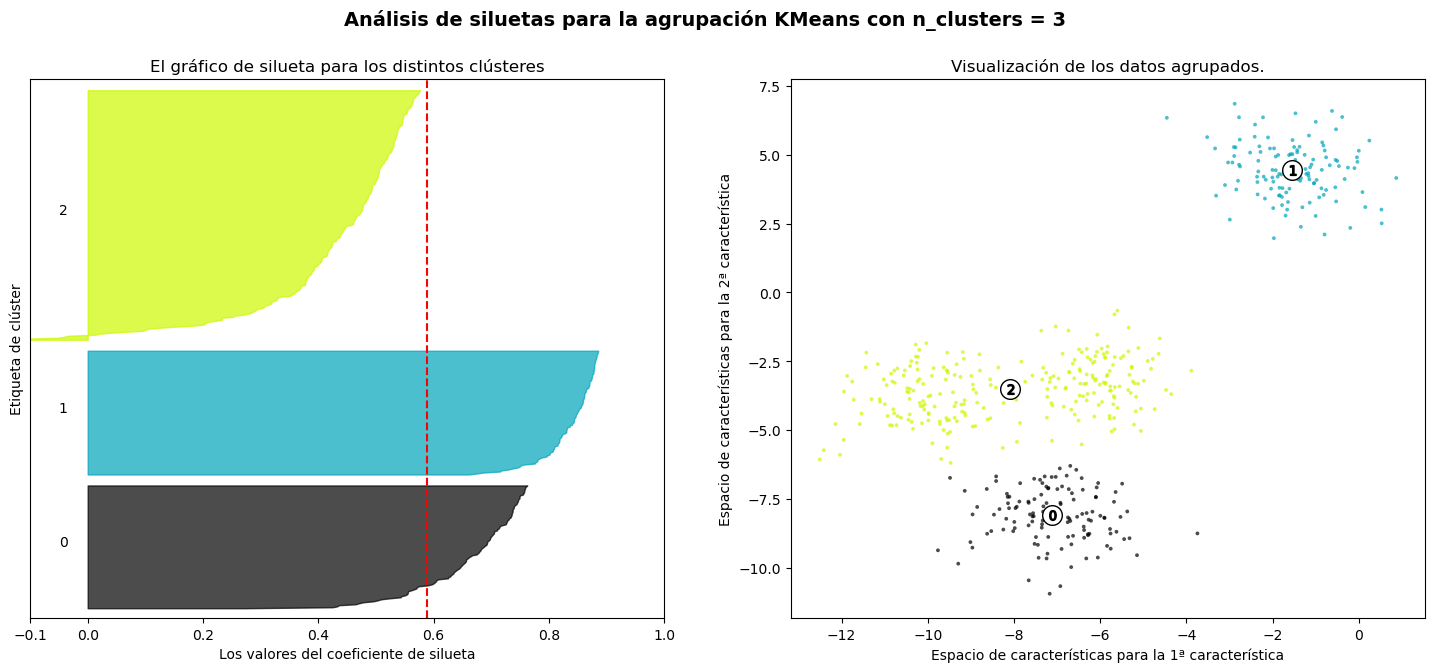

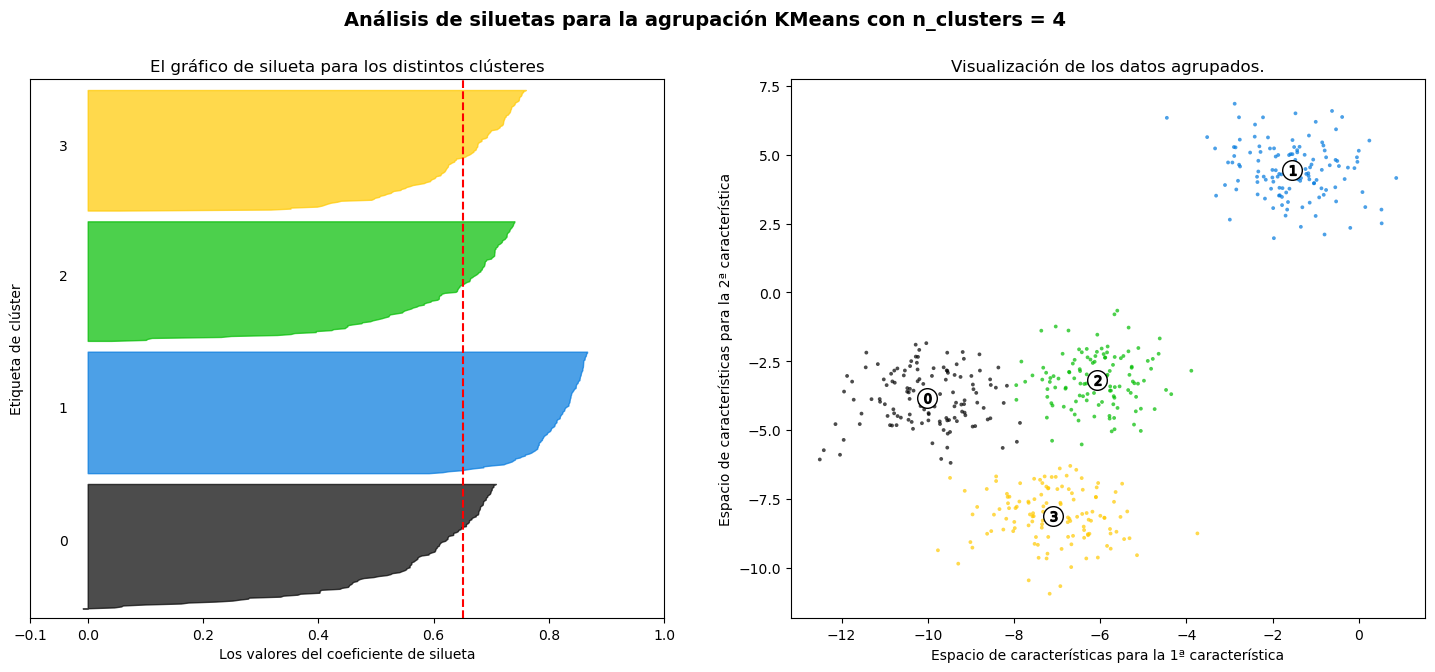

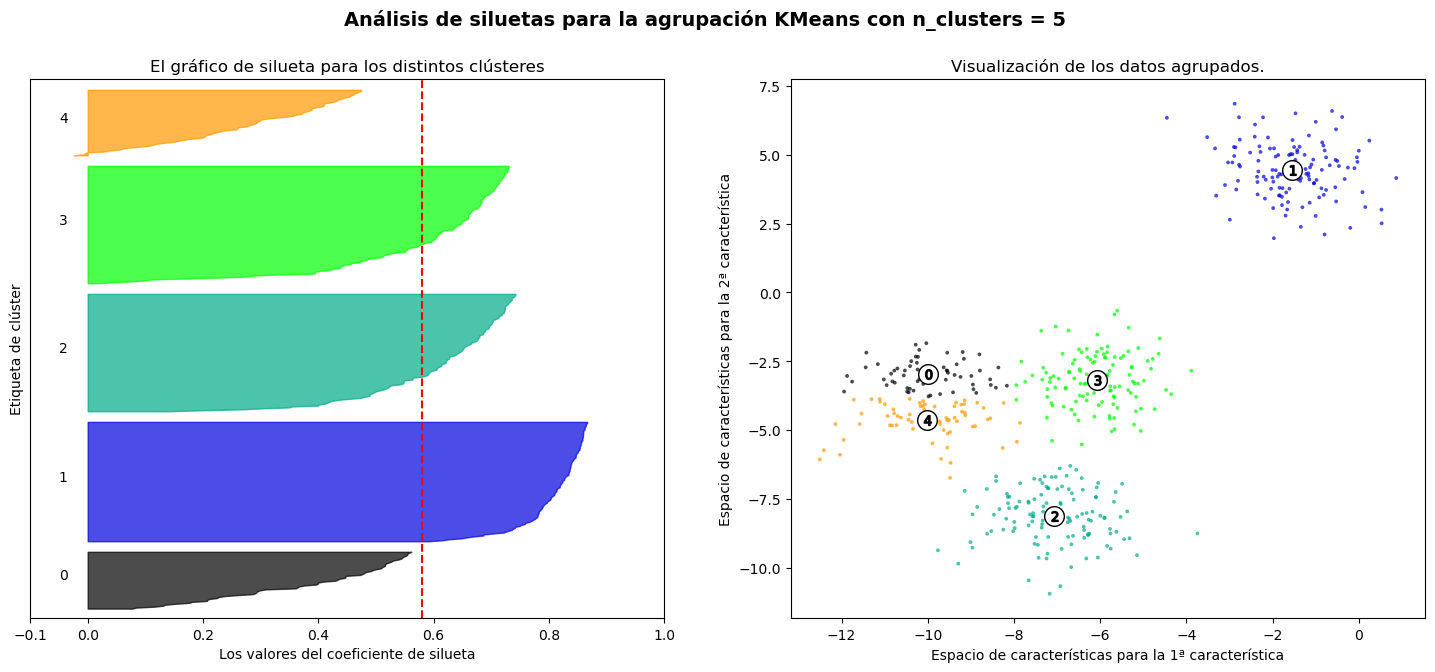

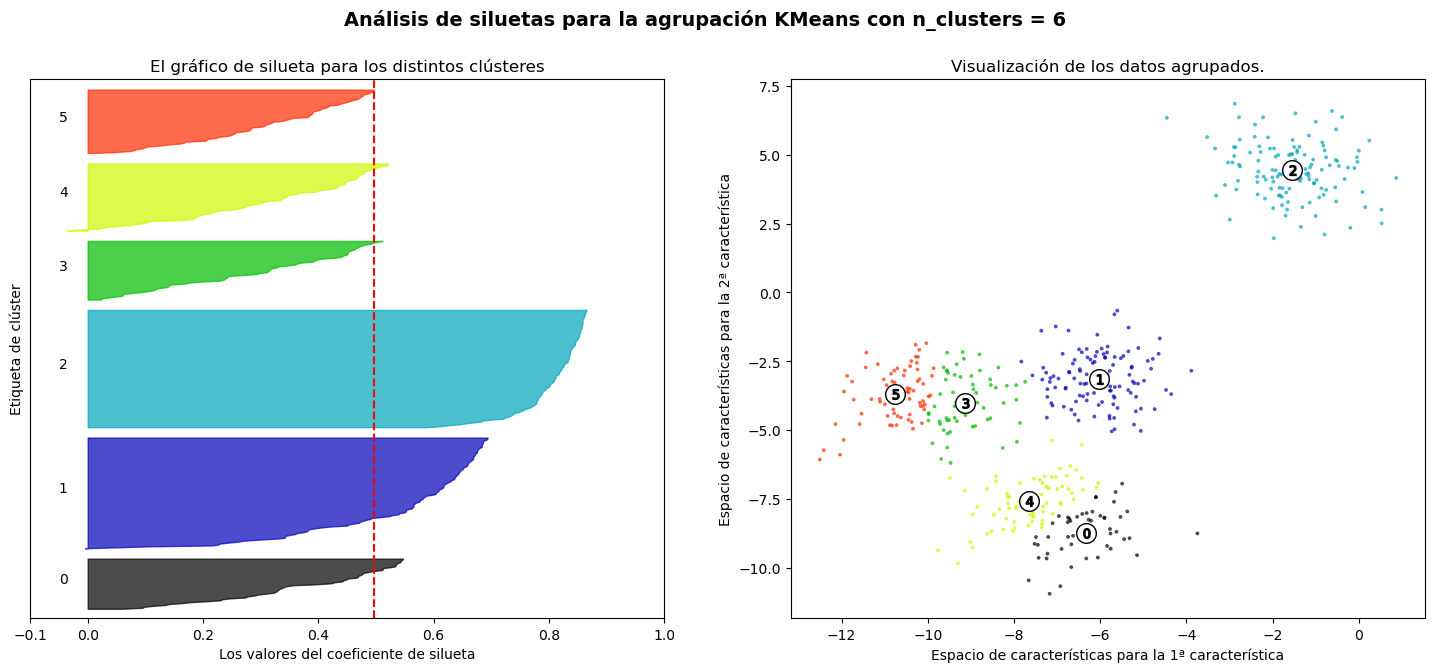

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generación de la muestra de datos con make_blobs
# La configuración considera un clúster distinto y
# 3 clústeres colocados de forma cercana
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crea un subplot con 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1es subplot el gráfico de silueta
    # El coeficiente de silueta puede estar entre -1, 1 
    # pero en este ejemplo todos caen entre  [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 es para insertar un espacio en blanco entre
    # los gráficos de silueta de los clústeres individuales,
    # para demarcarlos claramente
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Inicializar el clúster con el valor de n_clusters value
    # y una semilla de generación aleatoria de 10 para reproducibilidad.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # La puntuación de silueta proporciona el valor promedio de todas
    # las muestras.
    # Esto brinda una perspectiva de la densidad y la separación de
    # los grupos formados.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Calcular las puntuaciones de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Agrega las puntuaciones de silueta de las muestras que 
        # pertenecen al grupo i y las ordena
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquete los gráficos de silueta con sus números de 
        # clúster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calcular el nuevo y_lower para el siguiente gráfico
        y_lower = y_upper + 10  # 10 por las 0 muestras

    ax1.set_title("El gráfico de silueta para los distintos clústeres")
    ax1.set_xlabel("Los valores del coeficiente de silueta")
    ax1.set_ylabel("Etiqueta de clúster")

    # La línea vertical para la puntuación media de silueta
    # de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Limpiar las etiquetas/marcas del eje y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2º Gráfico que muestra los clústeres realmente formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Etiquetado de los clústeres
    centers = clusterer.cluster_centers_
    # Dibuja círculos blancos en los centros de los grupos.
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización de los datos agrupados.")
    ax2.set_xlabel("Espacio de características para la 1ª característica")
    ax2.set_ylabel("Espacio de características para la 2ª característica")

    plt.suptitle(("Análisis de siluetas para la agrupación KMeans "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()